In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn import metrics

import functools

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data
import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)


ModuleNotFoundError: No module named 'qiskit.aqua'

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn import metrics

import functools

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data
import logging
from qiskit import IBMQ

# Set up basic configuration for logging
logging.basicConfig(level=logging.DEBUG)

# Example to set up logging for a specific Qiskit component, if needed
logger = logging.getLogger('qiskit')
logger.setLevel(logging.DEBUG)


In [106]:
# Read out CSV

df = pd.read_csv("/home/suman/Downloads/Meritrank/NFT/sample.csv", sep=',')

In [107]:
# Review the information related to the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Columns: 200 entries, ID_BB_COMPANY to defaulted_in_last_6_months
dtypes: bool(2), float64(172), int64(4), object(22)
memory usage: 3.2+ MB


In [108]:
print(df.shape)

(2094, 200)


In [109]:
# Table of the description of the dataframe related to fixed parameters

df.describe()

,ID_BB_COMPANY,rr1_7,rr2_7,rr1_30,rr2_30,coupon rate,coupon frequency,SP500 MD,Average daily 1-year SP500 return,US Corporate Bond Yield Spread,...,PD_57_pd,PD_58_pd,PD_59_pd,PD_60_pd,dummyfin,coupon_category,duration_category,DTD,NI_Over_TA,Size
count,2.094000e+03,2094.000000,2094.000000,2094.000000,2094.000000,2093.000000,2051.000000,2094.000000,2094.000000,2078.000000,...,1961.000000,1961.000000,1961.000000,1961.000000,1342.0,2093.000000,2094.000000,1925.000000,2008.000000,2043.000000
mean,8.308882e+06,0.497765,0.488589,0.489718,0.480439,7.257692,8.098976,43.074795,0.004176,160.915646,...,0.380017,0.380788,0.381545,0.382288,0.0,3.415194,2.117479,-0.269432,-0.019077,-0.688292
std,1.301707e+07,0.329242,0.323472,0.331720,0.325601,2.987363,68.204924,247.994552,0.000674,84.047128,...,0.303848,0.303604,0.303364,0.303129,0.0,1.111430,0.966001,1.201107,0.047201,2.233017
min,1.000510e+05,0.000010,0.000010,0.000010,0.000010,0.000000,0.000000,-751.221200,0.002111,0.000000,...,0.000884,0.000922,0.000960,0.001000,0.0,1.000000,1.000000,-3.731576,-0.704043,-7.607816
25%,1.264992e+05,0.193976,0.190483,0.188437,0.184733,5.500000,2.000000,-72.765200,0.003778,119.103546,...,0.119921,0.120645,0.122166,0.124066,0.0,3.000000,2.000000,-1.046500,-0.018900,-2.534073
50%,8.301865e+05,0.443318,0.439581,0.430100,0.419847,7.500000,2.000000,67.908560,0.004227,141.412643,...,0.266650,0.267742,0.268917,0.270045,0.0,4.000000,2.000000,-0.461500,-0.005906,-0.716173
75%,1.099648e+07,0.802970,0.792033,0.793881,0.778429,9.100000,2.000000,160.498960,0.004603,174.372620,...,0.634422,0.634635,0.634839,0.635035,0.0,4.000000,2.000000,0.358162,0.000008,1.094505
max,6.920616e+07,1.132619,1.127143,1.099678,1.083808,15.500000,777.000000,653.512080,0.006996,637.607544,...,0.998768,0.998768,0.998768,0.998768,0.0,5.000000,5.000000,14.636354,0.035736,6.340440


In [110]:
# Separation of labels

df_labels = df['y']
df.drop(['y'],axis = 1,inplace = True)

KeyError: 'y'

In [111]:
print(df.columns)


Index(['ID_BB_COMPANY', 'bond_isin', 'default_date', 'rr1_7', 'rr2_7',
       'rr1_30', 'rr2_30', 'currency', 'seniorioty', 'seniorioty_adj',
       ...
       'PD_58_pd', 'PD_59_pd', 'PD_60_pd', 'dummyfin', 'coupon_category',
       'duration_category', 'DTD', 'NI_Over_TA', 'Size',
       'defaulted_in_last_6_months'],
      dtype='object', length=200)


In [112]:
# Assuming 'defaulted_in_last_6_months' is the label column
df_labels = df['duration_category']
df.drop(['duration_category'], axis=1, inplace=True)


In [113]:
# Train data definition

df_features = df
df_features.head()

,ID_BB_COMPANY,bond_isin,default_date,rr1_7,rr2_7,rr1_30,rr2_30,currency,seniorioty,seniorioty_adj,...,PD_57_pd,PD_58_pd,PD_59_pd,PD_60_pd,dummyfin,coupon_category,DTD,NI_Over_TA,Size,defaulted_in_last_6_months
0,129240,CH0002725106,03-08-1996 00:00,0.721750,0.718437,0.466602,0.464364,USD,Unsecured,Unsecured,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-0.145459,False
1,116977,US704378AD06,21-07-1997 00:00,0.247997,0.241752,0.212016,0.205964,USD,Senior Subordinated Unsecured,Senior Subordinated Unsecured,...,0.560783,0.561355,0.561903,0.562430,0.0,4.0,-0.767563,-0.003347,-1.424423,False
2,103782,US318908AA80,01-08-1997 00:00,0.675271,0.673903,0.593823,0.590595,USD,Subordinated Unsecured,Subordinated Unsecured,...,0.116846,0.117021,0.117188,0.117349,0.0,4.0,-0.718216,-0.005708,-3.235306,False
3,129443,CH0001237681,15-10-1997 00:00,1.018514,1.017482,1.018567,1.017481,CHF,Unsecured,Unsecured,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False
4,129443,CH0001352027,15-10-1997 00:00,0.851555,0.848116,0.851770,0.848148,CHF,Unsecured,Unsecured,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False


In [114]:
# Split dataset into train and test

sample_train, sample_test, label_train, label_test = train_test_split(
     df_features, df_labels, test_size=0.2, random_state=22)

In [115]:
# Reduce dimensions using PCA so later you can fit the dimensions with the qubits

n_dim = 2
pca = PCA(n_components=n_dim).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)


ValueError: could not convert string to float: 'US36191UAA43'

In [116]:
#Check the non-Numeric columns
# Check for non-numeric columns
non_numeric_columns = sample_train.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index(['bond_isin', 'default_date', 'currency', 'seniorioty', 'seniorioty_adj',
       'maturity_type', 'call type', 'put type', 'Convertible',
       'coupon type -code', 'coupon type - desciption', 'domicile_country',
       'exchange_country', 'Industry_sector', 'Industry_group',
       'Industry_subgroup', 'event_type', 'event_type_subcategory',
       'event_type_subcategory_sum', 'exit_type', 'exit_type_subcategory',
       'date_implied_vol'],
      dtype='object')


In [117]:
#Convert Non-Numeric Columns Using One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Assuming you need to keep the non-numeric data
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(sample_train[non_numeric_columns])
encoded_columns_test = encoder.transform(sample_test[non_numeric_columns])

# Create DataFrame from encoded columns
encoded_df = pd.DataFrame(encoded_columns, index=sample_train.index)
encoded_df_test = pd.DataFrame(encoded_columns_test, index=sample_test.index)

# Drop original non-numeric columns and concatenate encoded columns
sample_train = sample_train.drop(columns=non_numeric_columns).join(encoded_df)
sample_test = sample_test.drop(columns=non_numeric_columns).join(encoded_df_test)


ValueError: Found unknown categories ['US110394AE39', 'US12543DBH26', 'US29257MAE03', 'XS2027426027', 'XS1725308859', 'USU23830AC31', 'USL15588AA16', 'INE528G08378', 'US925529AG44', 'XS2342499592', 'US428337AA70', 'USG6917LAA38', 'USU7049LAB46', 'US45790VAA89', 'XS0452168536', 'XS2348280962', 'CND10002D795', 'USU15677AD65', 'XS0281713155', 'XS2231563805', 'US521865AP00', 'USU42714AB82', 'US37951DAA00', 'US29266SAC08', 'USN06364AB44', 'XS1760383577', 'XS1545743442', 'US302088AJ87', 'USU0237LAJ45', 'XS1668125427', 'US144577AH67', 'US559079AE88', 'CH0002725106', 'US006848BG95', 'XS1555300497', 'MYBUP1701337', 'US208464AR80', 'XS2226898216', 'CND10004G5B3', 'INE999B07044', 'US269153AJ13', 'XS0301051768', 'XS2358480155', 'US83001PAD15', 'XS2050914832', 'XS1598221338', 'US899896AA26', 'US708160BS43', 'US421924AJ00', 'XS1903671854', 'US975515AX51', 'XS2328508846', 'US54986QAA58', 'US440694AC13', 'XS2210790783', 'SG55I2992272', 'US03234GAD88', 'XS0124212738', 'US74972EAD04', 'US427093AA76', 'US749361AC50', 'US629571AA86', 'US28140JAF75', 'US903914AA73', 'USU9649TAA98', 'US02076XAF96', 'US73109PAB76', 'US29255WAH34', 'US346091BG57', 'XS0302069249', 'SG55F3991618', 'CND10006G2K9', 'XS1829905741', 'XS1976760782', 'XS1057356773', 'USU53538AE15', 'US440694AB30', 'XS2022224047', 'XS2198851482', 'CND10004GR89', 'USU17127AV08', 'JP370720AR94', 'US87406DAC20', 'US86732YAJ82', 'US03236MAJ09', 'USU20608AF91', 'US30033RAE80', 'CH0005406043', 'US524908XD75', 'US12543DBK54', 'US292052AA57', 'US29259GAC50', 'XS0483697156', 'CND10005Z1T0', 'US120114AC70', 'US62913FAC68', 'XS2106329134', 'XS1617833584', 'XS1669865591', 'US169905AE60', 'US55277JAA60', 'US656568AD40', 'US13123XBB73', 'US023850AC41', 'US86732YAK55', 'XS2076775233', 'USU66499AC57', 'CA019344AB61', 'MYBUN1701316', 'US15671BAG68', 'US25271CAP77', 'US842815AC63', 'USG98100AA11', 'XS1953029284', 'US421924AZ42', 'US305560AF16', 'US709600AA81', 'XS2100654586', 'US40537QAN07', 'US966387AP71', 'XS0854044822', 'XS1969792800', 'XS2459381443', 'US65333HAG83', 'US00753CAC64', 'US69344VAC54', 'US9226ALAA26', 'US29266SAE63', 'US74909EAC03', 'XS2244315110', 'US37045EAS72', 'US45811EAB92', 'US71825PAE88', 'US31431BAD10', 'US462044AH19', 'USG6869XAA57', 'US461203AL53', 'US521865AM78', 'US65333HAD52', 'US124923AB90', 'US461203AQ41', 'TW0002517208', 'US170032AL08', 'US985577AA37', 'US29482PAA84', 'CND10000GLY3', 'US30024BAB09', 'US30227MAA36', 'US67021BAD10', 'US872962AE51', 'US240028AF78', 'US449247AA34', 'XS0979033106', 'US984249AB86', 'US33616CAB63', 'US343412AF90', 'US36159RAG83', 'US235811AY27', 'US86732YAB56', 'USU70493AE87', 'TW000B850056', 'US721501AE41', 'CH0004074685', 'US704378AD06', 'SG6Q77974112', 'US24823QAC15', 'XS2076026983', 'CND10003TSR9', 'US36251NHL64', 'MYBUR1701358', 'CND1000458D5', 'US208464AT47', 'XS2152219973', 'US36250CJA36', 'JP348020PH76', 'XS1833288597', 'US71426VAK44', 'US590479AA91', 'XS0265209162', 'US19075FAG19', 'US293561BW52', 'XS2336348326', 'US42952UAA16', 'XS2383329237', 'CND10003NDK9', 'US629571AB69', 'XS2385392936', 'US68812RAC97', 'US339130AW64', 'TH9326034A01', 'US817587AC20', 'US739363AD17', 'XS0332494110', 'CND100035JX6', 'US83001PAH29', 'SG6QG3000005', 'US80007PAX78', 'US983759AA99', 'US704549AQ70', 'US35906AAX63', 'US169905AF36', 'USY4S71YAA27', 'US030789AM32', 'XS2050860308', 'US442488CH38', 'US146869AJ18', 'US006848BK08', 'US536022AJ55', 'US458742AA19', 'US20033RFN44', 'US582266AP72', 'US667280AA96', 'US656569AL49', 'US817917AB30', 'US78454LAL45', 'US704549AL83', 'US33616CAC47', 'US65333HAP82', 'US12543DBL38', 'US48019TAE47', 'US13123XAT90', 'US78486QAL59', 'XS1382385471', 'US02076XAC65', 'XS1750118462', 'INE528G08162', 'US536022AL02', 'US74840DAB64', 'US757209AB76', 'US79970YAB11', 'US872443AB20', 'US48019TAB08', 'US664334AA73', 'XS1685542141', 'SG6YE4000003', 'US704549AM66', 'USU3025AAB53', 'USQ94606AH52', 'US52603BAC19', 'XS1577338772', 'USG44403AB26', 'US235811AJ59', 'US421924AX93', 'XS0854042537', 'XS2213954766', 'US590479AC57', 'US02554FAA03', 'US02359CAP14', 'XS1555631925', 'US893247AE62', 'US604675AB42', 'US939322AL70', 'US718252AH29', 'US90333EAC21', 'US452729AD81', 'US80517Q1426', 'US586049AB40', 'US590479AB74', 'SG6Q70974010', 'US36250CDS08', 'SG6W23985057', 'US461203AJ08', 'US302088AK50', 'XS0552084849', 'US5252M0GX98', 'US097793AB95'] in column 0 during transform

In [118]:
from sklearn.decomposition import PCA

n_dim = 2
pca = PCA(n_components=n_dim).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)


ValueError: could not convert string to float: 'US36191UAA43'

In [119]:
#Solving the Unknown Categories Error
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_columns = encoder.fit_transform(sample_train[non_numeric_columns])
encoded_columns_test = encoder.transform(sample_test[non_numeric_columns])

# Create DataFrame from encoded columns
encoded_df = pd.DataFrame(encoded_columns, index=sample_train.index)
encoded_df_test = pd.DataFrame(encoded_columns_test, index=sample_test.index)

# Drop original non-numeric columns and concatenate encoded columns
sample_train = sample_train.drop(columns=non_numeric_columns).join(encoded_df)
sample_test = sample_test.drop(columns=non_numeric_columns).join(encoded_df_test)


In [120]:
# Check for any remaining non-numeric columns and Solving the String to Float Conversion Error
non_numeric_after_encoding = sample_train.select_dtypes(include=['object']).columns
print(non_numeric_after_encoding)  # To see if there are any non-numeric columns left

# If there are still object type columns, decide whether to drop or encode them
sample_train = sample_train.drop(columns=non_numeric_after_encoding)
sample_test = sample_test.drop(columns=non_numeric_after_encoding)


Index([], dtype='object')


In [121]:
#Run PCA: Once all columns are confirmed numeric, run PCA
n_dim = 2
pca = PCA(n_components=n_dim).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [122]:
#Step 1: Handle NaNs and Infinites
# Fill NaNs with the mean of each column
sample_train = sample_train.fillna(sample_train.mean())
sample_test = sample_test.fillna(sample_train.mean())  # Use training mean to fill test to avoid data leakage

# Check and replace infinities if they exist
sample_train = sample_train.replace([np.inf, -np.inf], np.nan)
sample_test = sample_test.replace([np.inf, -np.inf], np.nan)

# After replacing infinities with NaNs, fill them again
sample_train = sample_train.fillna(sample_train.mean())
sample_test = sample_test.fillna(sample_train.mean())


In [123]:
#Run PCA
from sklearn.decomposition import PCA

n_dim = 2
pca = PCA(n_components=n_dim).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)


In [124]:
# Normalize

std_scale = StandardScaler().fit(sample_train)
sample_train = std_scale.transform(sample_train)
sample_test = std_scale.transform(sample_test)

In [125]:
# Scale for better fit within the feature map

samples = np.append(sample_train, sample_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
sample_train = minmax_scale.transform(sample_train)
sample_test = minmax_scale.transform(sample_test)

In [126]:
# Select a sample for a better control of the research and wall time

train_size = 160
sample_train = sample_train[:train_size]
label_train = label_train[:train_size]

test_size = 40
sample_test = sample_test[:test_size]
label_test = label_test[:test_size]

In [127]:
# Review the balance of the target variable in train

label_train.value_counts(normalize=True)*100

2    58.75
1    20.00
3    10.00
5     6.25
4     5.00
Name: duration_category, dtype: float64

In [128]:
# Review the balance of the target variable in test

label_test.value_counts(normalize=True)*100

2    62.5
1    17.5
3    12.5
5     7.5
Name: duration_category, dtype: float64

In [129]:
# Basic parameters for hybrid model

seed = 8500
feature_dim = n_dim

In [130]:
# Define feature_map

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2)

# Define the backend
backend = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"), shots=256, seed_simulator=seed, seed_transpiler=seed
)


INFO:qiskit.compiler.assembler:Total Assembly Time - 0.15259 (ms)
INFO:qiskit.compiler.assembler:Total Assembly Time - 0.06604 (ms)
INFO:qiskit.compiler.assembler:Total Assembly Time - 0.05412 (ms)
INFO:qiskit.compiler.assembler:Total Assembly Time - 0.05054 (ms)
INFO:qiskit.compiler.assembler:Total Assembly Time - 0.05078 (ms)
INFO:qiskit.compiler.assembler:Total Assembly Time - 0.05364 (ms)
INFO:qiskit.compiler.assembler:Total Assembly Time - 0.05198 (ms)
INFO:qiskit.compiler.assembler:Total Assembly Time - 0.05054 (ms)
INFO:qiskit.compiler.assembler:Total Assembly Time - 0.05674 (ms)
INFO:qiskit.compiler.assembler:Total Assembly Time - 0.05388 (ms)
INFO:qiskit.compiler.assembler:Total Assembly Time - 0.05412 (ms)
/home/suman/.local/lib/python3.6/site-packages/pkg_resources/__init__.py:119: PkgResourcesDeprecationWarning: 0.18ubuntu0.18.04.1 is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,
INFO:qiskit.utils.quantum_instance:
Qiskit

In [131]:
# Define the kernel

kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

# Model run
svc = SVC(kernel=kernel.evaluate)
svc.fit(sample_train, label_train)
score = svc.score(sample_test, label_test)

print(f"Callable kernel classification test score: {score}")

DEBUG:stevedore._cache:reading /home/suman/.cache/python-entrypoints/5c40300cbcbb55bc9a9461cf7671f1511269e6bfb0cc2c312da052366757cee8
DEBUG:stevedore._cache:writing to /home/suman/.cache/python-entrypoints/5c40300cbcbb55bc9a9461cf7671f1511269e6bfb0cc2c312da052366757cee8
DEBUG:stevedore.extension:found extension EntryPoint(name='aqc', value='qiskit.transpiler.synthesis.aqc.aqc_plugin:AQCSynthesisPlugin', group='qiskit.unitary_synthesis')
DEBUG:stevedore.extension:found extension EntryPoint(name='default', value='qiskit.transpiler.passes.synthesis.unitary_synthesis:DefaultUnitarySynthesis', group='qiskit.unitary_synthesis')
DEBUG:stevedore.extension:found extension EntryPoint(name='aqc', value='qiskit.transpiler.synthesis.aqc.aqc_plugin:AQCSynthesisPlugin', group='qiskit.unitary_synthesis')
DEBUG:stevedore.extension:found extension EntryPoint(name='default', value='qiskit.transpiler.passes.synthesis.unitary_synthesis:DefaultUnitarySynthesis', group='qiskit.unitary_synthesis')
INFO:qiskit

Callable kernel classification test score: 0.625


In [132]:
result_predict = svc.predict(sample_test)

DEBUG:stevedore.extension:found extension EntryPoint(name='aqc', value='qiskit.transpiler.synthesis.aqc.aqc_plugin:AQCSynthesisPlugin', group='qiskit.unitary_synthesis')
DEBUG:stevedore.extension:found extension EntryPoint(name='default', value='qiskit.transpiler.passes.synthesis.unitary_synthesis:DefaultUnitarySynthesis', group='qiskit.unitary_synthesis')
DEBUG:stevedore.extension:found extension EntryPoint(name='aqc', value='qiskit.transpiler.synthesis.aqc.aqc_plugin:AQCSynthesisPlugin', group='qiskit.unitary_synthesis')
DEBUG:stevedore.extension:found extension EntryPoint(name='default', value='qiskit.transpiler.passes.synthesis.unitary_synthesis:DefaultUnitarySynthesis', group='qiskit.unitary_synthesis')
INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.01073 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 2.50745 (ms)
INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {('p', 1), ('measure',

In [135]:
print("Precision (Weighted, Zero Division=1):", metrics.precision_score(label_test, result_predict, average='weighted', zero_division=1))


Precision (Weighted, Zero Division=1): 0.6822368421052631


In [137]:
# Calculate classification metrics with handling zero division
precision_weighted = metrics.precision_score(label_test, result_predict, average='weighted', zero_division=0)
recall_weighted = metrics.recall_score(label_test, result_predict, average='weighted', zero_division=0)
f1_score_weighted = metrics.f1_score(label_test, result_predict, average='weighted', zero_division=0)
balanced_accuracy = metrics.balanced_accuracy_score(label_test, result_predict)

# Create a DataFrame to hold the metrics
metrics_data = {
    "Precision (Weighted)": [precision_weighted],
    "Recall (Weighted)": [recall_weighted],
    "F1 Score (Weighted)": [f1_score_weighted],
    "Balanced Accuracy": [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_data)

# Print the DataFrame
print(metrics_df)


   Precision (Weighted)  Recall (Weighted)  F1 Score (Weighted)  \
0              0.482237              0.625             0.515079   

   Balanced Accuracy  
0           0.275714  


In [139]:
from tabulate import tabulate

# Assuming the metrics_df is already created as above
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))


+----------------------+-------------------+---------------------+-------------------+
| Precision (Weighted) | Recall (Weighted) | F1 Score (Weighted) | Balanced Accuracy |
+----------------------+-------------------+---------------------+-------------------+
|       0.482237       |       0.625       |      0.515079       |     0.275714      |
+----------------------+-------------------+---------------------+-------------------+


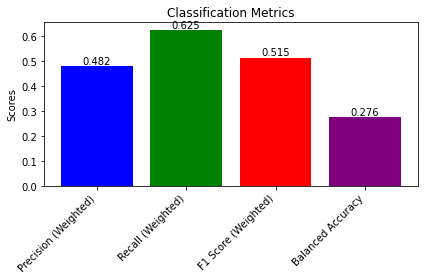

In [141]:
import matplotlib.pyplot as plt

# Metrics data
metrics_data = {
    "Precision (Weighted)": 0.482237,
    "Recall (Weighted)": 0.625,
    "F1 Score (Weighted)": 0.515079,
    "Balanced Accuracy": 0.275714
}

# Create lists from the dictionary for plotting
labels = list(metrics_data.keys())
values = list(metrics_data.values())

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'red', 'purple'])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Legend is not necessary if we are labeling the bars directly, so it can be omitted
# ax.legend(bars, labels)

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

# Adjust the subplot layout to provide space for x-axis labels
plt.tight_layout()

# Show the plot
plt.show()


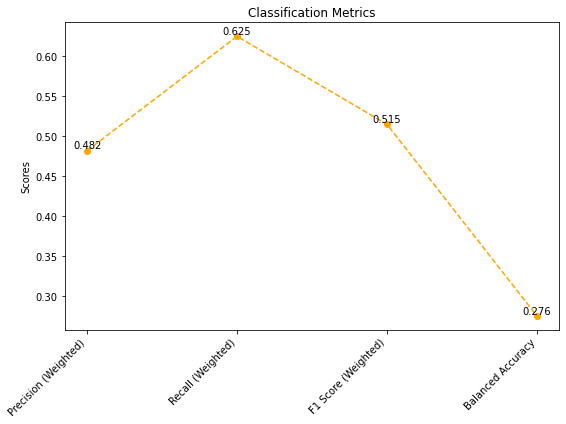

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
metrics_data = {
    "Precision (Weighted)": 0.482237,
    "Recall (Weighted)": 0.625,
    "F1 Score (Weighted)": 0.515079,
    "Balanced Accuracy": 0.275714
}

# Create lists from the dictionary for plotting
categories = list(metrics_data.keys())
values = list(metrics_data.values())

# Create a scatter plot with a line graph overlay
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot for all metric values
ax.scatter(categories, values, color='orange')

# Line plot connecting all metric values
ax.plot(categories, values, color='orange', linestyle='--')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics')
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha="right")

# Adding value labels on top of each scatter point
for i, value in enumerate(values):
    ax.text(i, value, f'{value:.3f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.show()
